In [2]:
import pandas as pd
import numpy as np
from nemosis import static_table, dynamic_data_compiler
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# Specify where we will be caching the raw AEMO data.
raw_data_cache = '/Volumes/T7/NEMO_data'

In [4]:
# Download the latest Generators and Scheduled Loads table. The 
# update_static_file=True argument forces nemosis to download a new copy of 
# file from AEMO even if a copy already exists in the cache.
dispatch_units = static_table(table_name='Generators and Scheduled Loads', 
                              raw_data_location=raw_data_cache,
                              update_static_file=True)

INFO: Retrieving static table Generators and Scheduled Loads
INFO: Downloading data for table Generators and Scheduled Loads


In [ ]:
test_volume_bids = dynamic_data_compiler(start_time='2015/07/01 00:00:00',
                                   end_time='2024/01/31 00:00:00',
                                   table_name='BIDPEROFFER_D',
                                   raw_data_location=raw_data_cache)

INFO: Compiling data for table BIDPEROFFER_D
INFO: Creating feather file for BIDPEROFFER_D, 2015, 08
INFO: Downloading data for table BIDPEROFFER_D, year 2015, month 09
INFO: Creating feather file for BIDPEROFFER_D, 2015, 09
INFO: Downloading data for table BIDPEROFFER_D, year 2015, month 10
INFO: Creating feather file for BIDPEROFFER_D, 2015, 10
INFO: Downloading data for table BIDPEROFFER_D, year 2015, month 11
INFO: Creating feather file for BIDPEROFFER_D, 2015, 11
INFO: Downloading data for table BIDPEROFFER_D, year 2015, month 12
INFO: Creating feather file for BIDPEROFFER_D, 2015, 12
INFO: Downloading data for table BIDPEROFFER_D, year 2016, month 01
INFO: Creating feather file for BIDPEROFFER_D, 2016, 01
INFO: Downloading data for table BIDPEROFFER_D, year 2016, month 02
INFO: Creating feather file for BIDPEROFFER_D, 2016, 02
INFO: Downloading data for table BIDPEROFFER_D, year 2016, month 03
INFO: Creating feather file for BIDPEROFFER_D, 2016, 03
INFO: Downloading data for tabl

INFO: Creating feather file for BIDPEROFFER_D, 2016, 10
INFO: Downloading data for table BIDPEROFFER_D, year 2016, month 11
INFO: Creating feather file for BIDPEROFFER_D, 2016, 11
INFO: Downloading data for table BIDPEROFFER_D, year 2016, month 12
INFO: Creating feather file for BIDPEROFFER_D, 2016, 12
INFO: Downloading data for table BIDPEROFFER_D, year 2017, month 01
INFO: Creating feather file for BIDPEROFFER_D, 2017, 01
INFO: Downloading data for table BIDPEROFFER_D, year 2017, month 02
INFO: Creating feather file for BIDPEROFFER_D, 2017, 02
INFO: Downloading data for table BIDPEROFFER_D, year 2017, month 03
INFO: Creating feather file for BIDPEROFFER_D, 2017, 03
INFO: Downloading data for table BIDPEROFFER_D, year 2017, month 04
INFO: Creating feather file for BIDPEROFFER_D, 2017, 04
INFO: Downloading data for table BIDPEROFFER_D, year 2017, month 05
INFO: Creating feather file for BIDPEROFFER_D, 2017, 05
INFO: Downloading data for table BIDPEROFFER_D, year 2017, month 06
INFO: Cr

INFO: Downloading data for table BIDPEROFFER_D, year 2018, month 02
INFO: Creating feather file for BIDPEROFFER_D, 2018, 02
INFO: Downloading data for table BIDPEROFFER_D, year 2018, month 03


In [ ]:
test_volume_bids.head()

In [ ]:
all_volume_bids = test_volume_bids.copy() 
all_volume_bids.head()

In [ ]:
test_price_bids = dynamic_data_compiler(start_time='2009/01/01 00:00:00',
                                   end_time='2024/01/31 00:00:00',
                                   table_name='BIDDAYOFFER_D',
                                   raw_data_location=raw_data_cache)

In [33]:
test_price_bids.head()

,SETTLEMENTDATE,DUID,BIDTYPE,OFFERDATE,VERSIONNO,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,PRICEBAND9,PRICEBAND10,MINIMUMLOAD,T1,T2,T3,T4
0,2023-12-31,ADPBA1L,RAISEREG,2023-12-31 03:56:32,1,5.0,8.00,12.00,18.00,24.00,47.00,98.00,268.00,498.00,12000.00,NaN,NaN,NaN,NaN,NaN
1,2023-12-31,ARWF1,ENERGY,2023-12-21 12:06:21,1,-889.9,-222.48,-195.78,-166.41,-153.95,-146.83,-111.24,222.48,2669.70,14772.34,NaN,NaN,NaN,NaN,NaN
2,2023-12-31,ASNENC1,RAISE6SEC,2023-12-30 17:36:35,1,0.3,0.72,1.43,2.25,4.35,7.47,11.48,17.70,55.00,14000.00,NaN,NaN,NaN,NaN,NaN
3,2023-12-31,ASQEEV1,RAISE6SEC,2023-12-31 03:58:19,1,0.0,1.00,2.00,4.00,8.00,16.00,32.00,64.00,128.00,256.00,NaN,NaN,NaN,NaN,NaN
4,2023-12-31,ASRMGE01,RAISE5MIN,2023-12-31 03:58:18,1,0.0,0.02,0.04,0.12,0.31,7.16,22.80,39.55,63.78,16600.00,NaN,NaN,NaN,NaN,NaN


In [14]:
melted_price_bids = pd.melt(test_price_bids, id_vars=['SETTLEMENTDATE', 'DUID', 'OFFERDATE'], 
                     value_vars=['PRICEBAND1', 'PRICEBAND2', 'PRICEBAND3', 'PRICEBAND4', 
                                 'PRICEBAND5', 'PRICEBAND6', 'PRICEBAND7', 'PRICEBAND8', 
                                 'PRICEBAND9', 'PRICEBAND10'],
                     var_name='BIDBAND', value_name='BIDPRICE')
melted_price_bids.head()

,SETTLEMENTDATE,DUID,OFFERDATE,BIDBAND,BIDPRICE
0,2023-12-31,ADPBA1L,2023-12-31 03:56:32,PRICEBAND1,5.0
1,2023-12-31,ARWF1,2023-12-21 12:06:21,PRICEBAND1,-889.9
2,2023-12-31,ASNENC1,2023-12-30 17:36:35,PRICEBAND1,0.3
3,2023-12-31,ASQEEV1,2023-12-31 03:58:19,PRICEBAND1,0.0
4,2023-12-31,ASRMGE01,2023-12-31 03:58:18,PRICEBAND1,0.0


In [15]:
melted_price_bids['APPLICABLEFROM'] = melted_price_bids['SETTLEMENTDATE'] + timedelta(hours=4, minutes=5)

In [16]:
melted_price_bids.head()
duid_counts = melted_price_bids['DUID'].value_counts()
duid_counts


DUID
LOYYB2      3410
LOYYB1      3410
LI_WY_CA    3100
ER04        2790
GSTONE1     2790
            ... 
RT_NSW1      310
BARCALDN     310
OAKLAND1     310
OAKEY2SF     310
WATERLWF     310
Name: count, Length: 480, dtype: int64

In [17]:
filtered_price_bids = melted_price_bids[melted_price_bids['DUID'] == 'LOYYB2']
filtered_price_bids['BIDBAND'] = pd.to_numeric(filtered_price_bids['BIDBAND'].str[9:])
filtered_price_bids

/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_41710/952395680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_price_bids['BIDBAND'] = pd.to_numeric(filtered_price_bids['BIDBAND'].str[9:])


,SETTLEMENTDATE,DUID,OFFERDATE,BIDBAND,BIDPRICE,APPLICABLEFROM
95,2023-12-31,LOYYB2,2023-12-31 03:59:48,1,4.98,2023-12-31 04:05:00
315,2023-12-31,LOYYB2,2023-12-31 03:36:15,1,9.85,2023-12-31 04:05:00
518,2023-12-31,LOYYB2,2023-12-30 10:38:31,1,0.00,2023-12-31 04:05:00
721,2023-12-31,LOYYB2,2023-12-31 03:36:15,1,4.77,2023-12-31 04:05:00
921,2023-12-31,LOYYB2,2023-12-30 10:38:31,1,0.00,2023-12-31 04:05:00
...,...,...,...,...,...,...
503553,2024-01-30,LOYYB2,2024-01-30 03:39:09,10,16600.00,2024-01-30 04:05:00
503554,2024-01-30,LOYYB2,2024-01-30 03:39:09,10,16600.00,2024-01-30 04:05:00
503555,2024-01-30,LOYYB2,2024-01-30 03:44:05,10,16600.00,2024-01-30 04:05:00
503756,2024-01-30,LOYYB2,2024-01-29 18:04:45,10,16238.12,2024-01-30 04:05:00


In [18]:
all_volume_bids.head()

,SETTLEMENTDATE,DUID,BIDTYPE,OFFERDATE,MAXAVAIL,ENABLEMENTMIN,ENABLEMENTMAX,LOWBREAKPOINT,HIGHBREAKPOINT,BANDAVAIL1,BANDAVAIL2,BANDAVAIL3,BANDAVAIL4,BANDAVAIL5,BANDAVAIL6,BANDAVAIL7,BANDAVAIL8,BANDAVAIL9,BANDAVAIL10,INTERVAL_DATETIME
390240,2023-12-31,ADPBA1G,ENERGY,2023-12-31 23:56:47,6,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,4,0,0,2024-01-01 00:05:00
390241,2023-12-31,ADPBA1G,LOWERREG,2023-12-31 23:56:47,6,0.0,6.0,6.0,6.0,0,0,0,0,0,0,0,6,0,0,2024-01-01 00:05:00
390242,2023-12-31,ADPBA1G,RAISE5MIN,2023-12-31 23:56:47,3,0.0,6.0,0.0,3.0,0,0,0,0,0,0,0,0,0,3,2024-01-01 00:05:00
390243,2023-12-31,ADPBA1G,RAISE60SEC,2023-12-31 23:56:47,3,0.0,6.0,0.0,3.0,0,0,0,0,0,0,0,0,0,3,2024-01-01 00:05:00
390244,2023-12-31,ADPBA1G,RAISE6SEC,2023-12-31 23:56:47,3,0.0,6.0,0.0,3.0,0,0,0,0,0,0,0,0,0,3,2024-01-01 00:05:00


In [19]:
filtered_volume_bids = all_volume_bids[all_volume_bids['BIDTYPE'] == 'ENERGY']
filtered_volume_bids =  filtered_volume_bids[filtered_volume_bids['DUID'] == 'LOYYB2']

In [20]:
volume_bids = filtered_volume_bids.copy()
volume_bids.head()

,SETTLEMENTDATE,DUID,BIDTYPE,OFFERDATE,MAXAVAIL,ENABLEMENTMIN,ENABLEMENTMAX,LOWBREAKPOINT,HIGHBREAKPOINT,BANDAVAIL1,BANDAVAIL2,BANDAVAIL3,BANDAVAIL4,BANDAVAIL5,BANDAVAIL6,BANDAVAIL7,BANDAVAIL8,BANDAVAIL9,BANDAVAIL10,INTERVAL_DATETIME
391065,2023-12-31,LOYYB2,ENERGY,2023-12-31 21:27:55,574,NaN,NaN,NaN,NaN,322,0,0,0,30,70,118,60,0,0,2024-01-01 00:05:00
392691,2023-12-31,LOYYB2,ENERGY,2023-12-31 21:27:55,574,NaN,NaN,NaN,NaN,322,0,0,0,30,70,118,60,0,0,2024-01-01 00:10:00
394317,2023-12-31,LOYYB2,ENERGY,2023-12-31 21:27:55,574,NaN,NaN,NaN,NaN,322,0,0,0,30,70,118,60,0,0,2024-01-01 00:15:00
395943,2023-12-31,LOYYB2,ENERGY,2023-12-31 21:27:55,574,NaN,NaN,NaN,NaN,322,0,0,0,30,70,118,60,0,0,2024-01-01 00:20:00
397569,2023-12-31,LOYYB2,ENERGY,2023-12-31 21:27:55,574,NaN,NaN,NaN,NaN,322,0,0,0,30,70,118,60,0,0,2024-01-01 00:25:00


In [21]:
# Reshape the data such that each bid volume is on its own row.
filtered_volume_bids = pd.melt(volume_bids, id_vars=['INTERVAL_DATETIME'], 
                      value_vars=['BANDAVAIL1', 'BANDAVAIL2', 'BANDAVAIL3', 'BANDAVAIL4', 
                                  'BANDAVAIL5', 'BANDAVAIL6', 'BANDAVAIL7', 'BANDAVAIL8', 
                                  'BANDAVAIL9', 'BANDAVAIL10'],
                      var_name='BIDBAND', value_name='BIDVOLUME')

In [22]:
filtered_volume_bids['BIDBAND'] = pd.to_numeric(filtered_volume_bids['BIDBAND'].str[9:])

In [23]:
bids = pd.merge_asof(filtered_volume_bids.sort_values('INTERVAL_DATETIME'), 
                     filtered_price_bids.sort_values('APPLICABLEFROM'), 
                     left_on='INTERVAL_DATETIME', right_on='APPLICABLEFROM',
                     by='BIDBAND')
bids.head()




,INTERVAL_DATETIME,BIDBAND,BIDVOLUME,SETTLEMENTDATE,DUID,OFFERDATE,BIDPRICE,APPLICABLEFROM
0,2024-01-01 00:05:00,1,322,2023-12-31,LOYYB2,2023-12-31 03:36:15,0.94,2023-12-31 04:05:00
1,2024-01-01 00:05:00,4,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,3.90,2023-12-31 04:05:00
2,2024-01-01 00:05:00,6,70,2023-12-31,LOYYB2,2023-12-31 03:36:15,9.69,2023-12-31 04:05:00
3,2024-01-01 00:05:00,3,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,2.01,2023-12-31 04:05:00
4,2024-01-01 00:05:00,7,118,2023-12-31,LOYYB2,2023-12-31 03:59:48,13.90,2023-12-31 04:05:00


In [24]:
trading_data = dynamic_data_compiler(
        start_time='2024/01/01 00:00:00',
        end_time='2024/01/31 00:00:00',
        table_name='TRADINGPRICE',
        raw_data_location=raw_data_cache
    )
trading_data

INFO: Compiling data for table TRADINGPRICE
INFO: Returning TRADINGPRICE.


,SETTLEMENTDATE,REGIONID,RRP,RAISE6SECRRP,RAISE60SECRRP,RAISE5MINRRP,RAISEREGRRP,LOWER6SECRRP,LOWER60SECRRP,LOWER5MINRRP,LOWERREGRRP,PRICE_STATUS
0,2024-01-02 03:30:00,NSW1,52.40,0.45,0.5,0.39,4.79,0.39,3.00,0.38,3.76,FIRM
1,2024-01-02 03:30:00,VIC1,44.93,0.45,0.5,0.39,4.79,0.39,3.00,0.38,3.76,FIRM
2,2024-01-02 03:30:00,SA1,47.47,0.45,0.5,0.39,4.79,0.39,3.00,0.38,3.76,FIRM
3,2024-01-02 03:30:00,QLD1,54.05,0.45,0.5,0.39,4.79,0.39,3.00,0.38,3.76,FIRM
4,2024-01-02 03:30:00,TAS1,130.24,0.45,0.5,0.39,5.33,0.38,0.38,0.00,6.27,FIRM
...,...,...,...,...,...,...,...,...,...,...,...,...
43768,2024-01-31 00:00:00,QLD1,85.55,0.48,0.5,0.39,5.50,0.03,0.08,0.20,1.20,FIRM
43769,2024-01-31 00:00:00,TAS1,35.23,0.48,0.5,0.39,5.86,0.03,0.08,0.00,3.53,FIRM
44300,2024-01-31 00:00:00,NSW1,62.75,0.48,0.5,0.39,5.50,0.03,0.08,0.20,1.20,FIRM
44301,2024-01-31 00:00:00,VIC1,19.19,0.48,0.5,0.39,5.50,0.03,0.08,0.20,1.20,FIRM


In [25]:
pivot_df = trading_data.pivot(index='SETTLEMENTDATE', columns='REGIONID', values='RRP')

# Reset column names (optional, if needed)
pivot_df.columns.name = None



In [26]:
# Calculate the row-wise mean across the specified columns and add it as a new column 'Average_Price'
pivot_df['Average_Price'] = pivot_df[['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']].mean(axis=1)

# Display the updated DataFrame
print(pivot_df.head())

                      NSW1   QLD1    SA1   TAS1   VIC1  Average_Price
SETTLEMENTDATE                                                       
2024-01-01 00:05:00  57.98  65.49  54.42  85.28  51.80         62.994
2024-01-01 00:10:00  70.27  79.41  68.20  85.28  64.27         73.486
2024-01-01 00:15:00  57.98  65.48  56.17  85.28  52.67         63.516
2024-01-01 00:20:00  54.95  61.60  52.29  85.28  48.78         60.580
2024-01-01 00:25:00  54.95  61.54  51.94  85.28  49.19         60.580


In [27]:
# Merge price_data onto bids based on SETTLEMENTDATE and INTERVAL_DATETIME
merged_df = pd.merge(bids, pivot_df, 
                     left_on='INTERVAL_DATETIME', right_on='SETTLEMENTDATE', 
                     how='left')

# Drop duplicates from merged_df, keeping only the first occurrence of each row
merged_df = merged_df.drop_duplicates()

In [49]:
merged_df.head(30)

,INTERVAL_DATETIME,BIDBAND,BIDVOLUME,SETTLEMENTDATE,DUID,OFFERDATE,BIDPRICE,APPLICABLEFROM,NSW1,QLD1,SA1,TAS1,VIC1,Average_Price
0,2024-01-01 00:05:00,1,322,2023-12-31,LOYYB2,2023-12-31 03:36:15,0.94,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
1,2024-01-01 00:05:00,4,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,3.90,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
2,2024-01-01 00:05:00,6,70,2023-12-31,LOYYB2,2023-12-31 03:36:15,9.69,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
3,2024-01-01 00:05:00,3,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,2.01,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
4,2024-01-01 00:05:00,7,118,2023-12-31,LOYYB2,2023-12-31 03:59:48,13.90,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
5,2024-01-01 00:05:00,9,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,199.00,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
6,2024-01-01 00:05:00,5,30,2023-12-31,LOYYB2,2023-12-31 03:59:48,4.90,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
7,2024-01-01 00:05:00,10,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,16600.00,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
8,2024-01-01 00:05:00,8,60,2023-12-31,LOYYB2,2023-12-31 03:59:48,58.50,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994
9,2024-01-01 00:05:00,2,0,2023-12-31,LOYYB2,2023-12-31 03:59:48,9.98,2023-12-31 04:05:00,57.98,65.49,54.42,85.28,51.80,62.994


In [35]:
# Assuming the data is in a pandas DataFrame named `df`
zero_bid_volume_count = merged_df[merged_df['BIDVOLUME'] == 0].shape[0]

print(f"Number of rows with BIDVOLUME = 0: {zero_bid_volume_count}")

Number of rows with BIDVOLUME = 0: 38476


In [52]:
import pandas as pd

# Assuming your data is in a DataFrame named `merged_df`

# Define a threshold for extreme negative spikes (e.g., BIDPRICE < -1000)
extreme_negative_threshold = -500

# Find rows with extreme negative spikes
extreme_negative_spikes = merged_df[merged_df['BIDPRICE'] < extreme_negative_threshold]

# Extract the unique days with extreme negative spikes
extreme_negative_spikes['DATE'] = extreme_negative_spikes['INTERVAL_DATETIME'].dt.date
unique_days = extreme_negative_spikes['DATE'].unique()

# Print the days with extreme negative spikes
print("Days with extreme negative spikes in BIDPRICE:")
for day in unique_days:
    print(day)

# Optional: Display detailed information about the spikes
print("\nDetailed rows with extreme negative spikes:")
print(extreme_negative_spikes)

Days with extreme negative spikes in BIDPRICE:
2024-01-04
2024-01-05
2024-01-06
2024-01-20
2024-01-21
2024-01-26
2024-01-27
2024-01-29
2024-01-30

Detailed rows with extreme negative spikes:
        INTERVAL_DATETIME  BIDBAND  BIDVOLUME SETTLEMENTDATE    DUID  \
9123  2024-01-04 04:05:00        1        322     2024-01-04  LOYYB2   
9139  2024-01-04 04:10:00        1        322     2024-01-04  LOYYB2   
9145  2024-01-04 04:15:00        1        322     2024-01-04  LOYYB2   
9150  2024-01-04 04:20:00        1        322     2024-01-04  LOYYB2   
9164  2024-01-04 04:25:00        1        322     2024-01-04  LOYYB2   
9175  2024-01-04 04:30:00        1        322     2024-01-04  LOYYB2   
9187  2024-01-04 04:35:00        1        322     2024-01-04  LOYYB2   
9197  2024-01-04 04:40:00        1        322     2024-01-04  LOYYB2   
9200  2024-01-04 04:45:00        1        322     2024-01-04  LOYYB2   
9216  2024-01-04 04:50:00        1        322     2024-01-04  LOYYB2   
9223  2024-01-04 

/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_41710/2467432788.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_negative_spikes['DATE'] = extreme_negative_spikes['INTERVAL_DATETIME'].dt.date


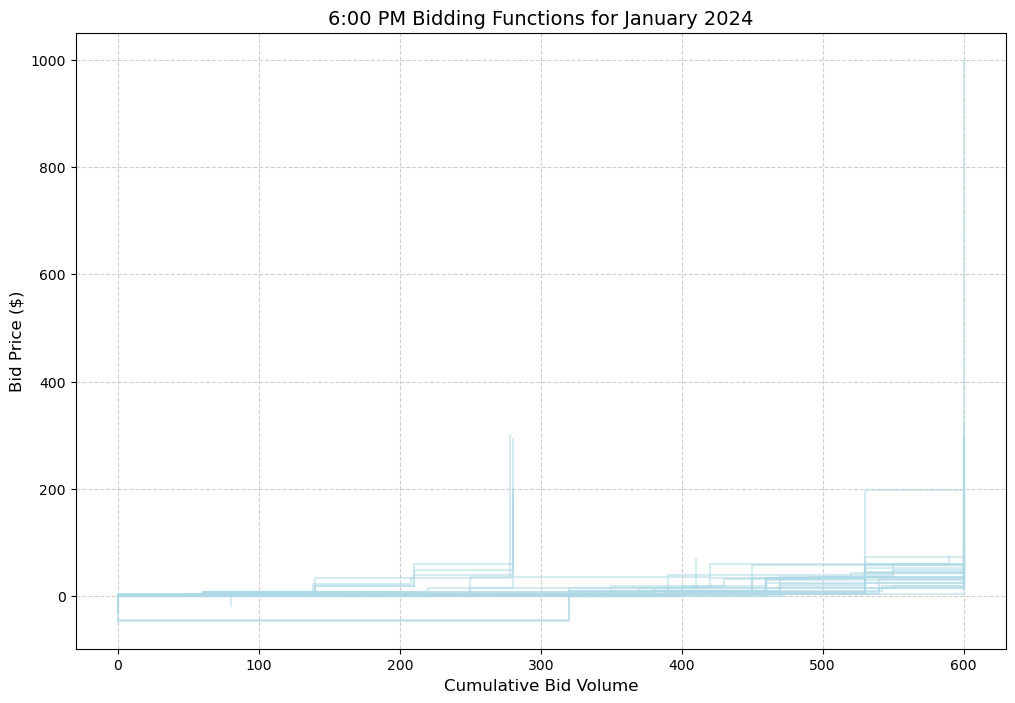

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named `merged_df`

# Ensure INTERVAL_DATETIME is in datetime format
merged_df['INTERVAL_DATETIME'] = pd.to_datetime(merged_df['INTERVAL_DATETIME'])

# Filter for all 6:00 PM intervals in a specific month
start_date = '2024-01-01'
end_date = '2024-01-31'
filtered_month_df = merged_df[
    (merged_df['INTERVAL_DATETIME'] >= start_date) & 
    (merged_df['INTERVAL_DATETIME'] <= end_date) &
    (merged_df['INTERVAL_DATETIME'].dt.time == pd.to_datetime("18:00:00").time())
]

# Plot all 6:00 PM bidding functions
plt.figure(figsize=(12, 8))

for interval in filtered_month_df['INTERVAL_DATETIME'].unique():
    interval_df = filtered_month_df[filtered_month_df['INTERVAL_DATETIME'] == interval]
    
    # Sort data by BIDPRICE and filter out extreme prices
    interval_df = interval_df.sort_values(by='BIDPRICE')
    interval_df = interval_df[(interval_df['BIDPRICE'] > -500) & (interval_df['BIDPRICE'] < 1000)]

    # Calculate cumulative bid volume
    interval_df['Cumulative_BidVolume'] = interval_df['BIDVOLUME'].cumsum()
    
    # Plot the step function in light blue
    plt.step(interval_df['Cumulative_BidVolume'], interval_df['BIDPRICE'], where='post', color='lightblue', alpha=0.5)

# Add labels and title
plt.xlabel('Cumulative Bid Volume', fontsize=12)
plt.ylabel('Bid Price ($)', fontsize=12)
plt.title('6:00 PM Bidding Functions for January 2024', fontsize=14)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [ ]:
import statsmodels.api as sm

# Function to run a regression and print summary
def run_regression(y, X):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

print("Regression of Average Trading Price on Bid Price:")
model_price_quantity = run_regression(merged_df['BIDPRICE'], merged_df['Average_Price'])

In [ ]:
# Calculate mean, median, and standard deviation for 'BIDPRICE' and 'BIDVOLUME'
bid_price_mean = bids['BIDPRICE'].mean()
bid_price_median = bids['BIDPRICE'].median()
bid_price_std = bids['BIDPRICE'].std()

bid_volume_mean = bids['BIDVOLUME'].mean()
bid_volume_median = bids['BIDVOLUME'].median()
bid_volume_std = bids['BIDVOLUME'].std()

# Display results
print("Bid Price Mean:", bid_price_mean)
print("Bid Price Median:", bid_price_median)
print("Bid Price Std Dev:", bid_price_std)

print("Bid Volume Mean:", bid_volume_mean)
print("Bid Volume Median:", bid_volume_median)
print("Bid Volume Std Dev:", bid_volume_std)

In [ ]:
# Plot the results.
fig = px.area(bids.sort_values('BIDBAND'), x='INTERVAL_DATETIME', 
              y='BIDVOLUME', color='BIDPRICE')
fig.update_layout(yaxis_title="MW")
fig.show()